In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
filen=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [6]:
filen.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
filen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
filen.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
filen.isnull().sum()

Hours     0
Scores    0
dtype: int64

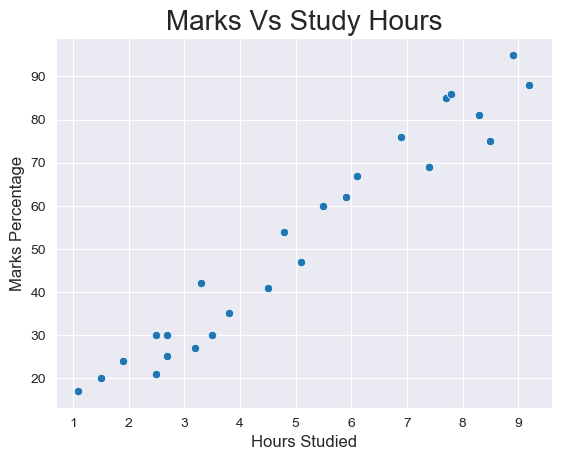

In [12]:
sns.set_style('darkgrid')
sns.scatterplot(y= filen['Scores'], x= filen['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

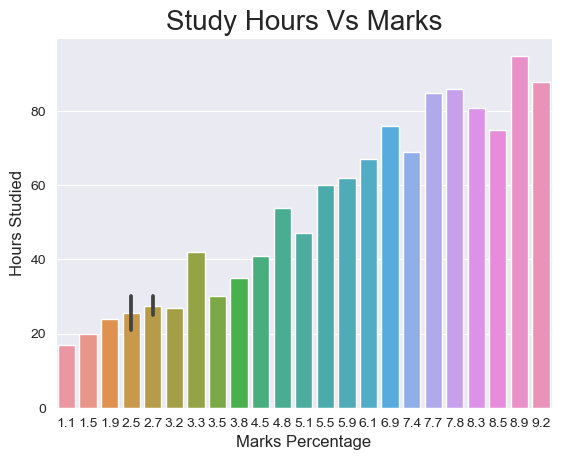

In [13]:
sns.set_style('darkgrid')
sns.barplot(x='Hours',y='Scores',data = df)
plt.title('Study Hours Vs Marks',size=20)
plt.xlabel('Marks Percentage', size=12)
plt.ylabel('Hours Studied', size=12)
plt.show()

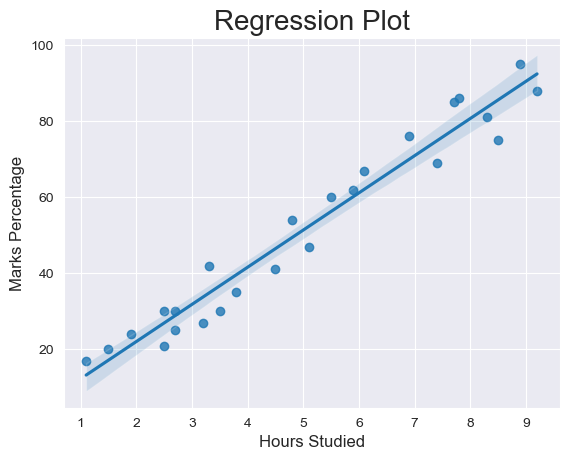

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [14]:
sns.regplot(x='Hours', y='Scores',data=filen)
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(df.corr())

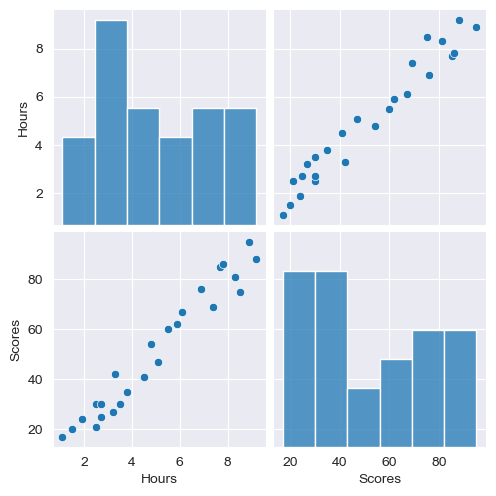

In [15]:
sns.pairplot(data=filen)

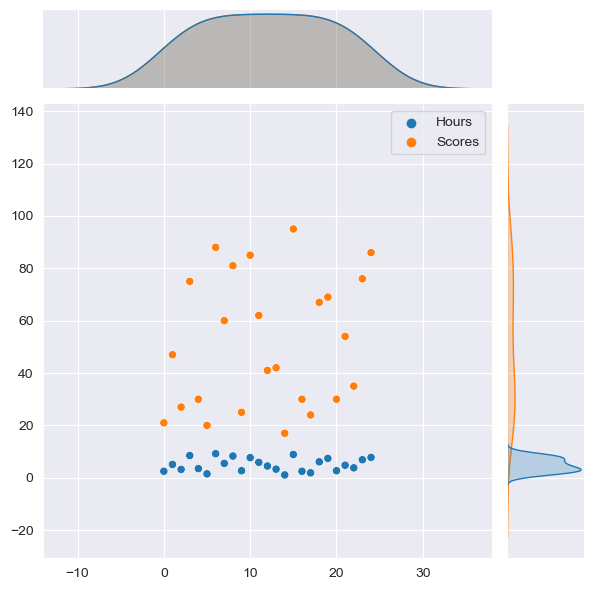

In [16]:
sns.jointplot(data=filen)

<Axes: ylabel='Density'>

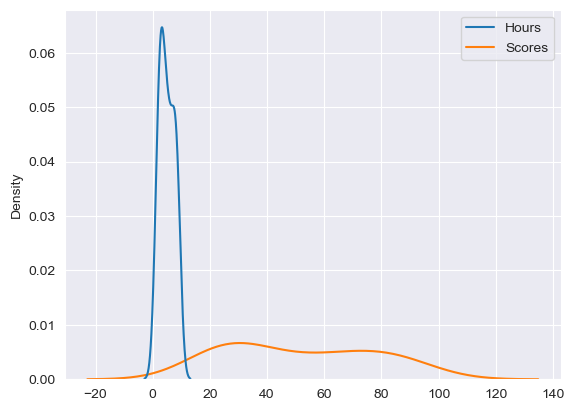

In [17]:
sns.kdeplot(data=filen)

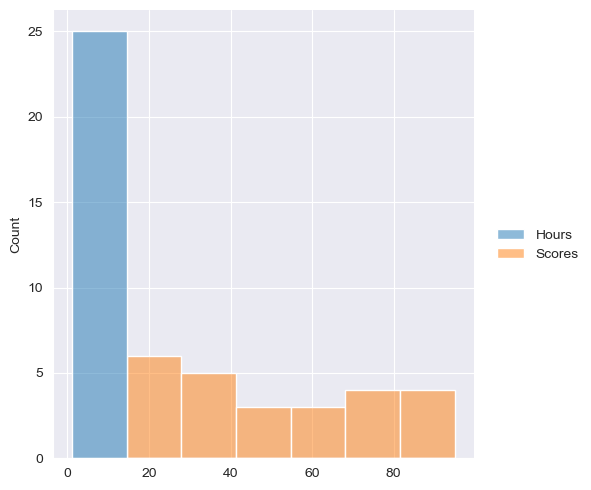

In [18]:
sns.displot(data=filen)

<Axes: >

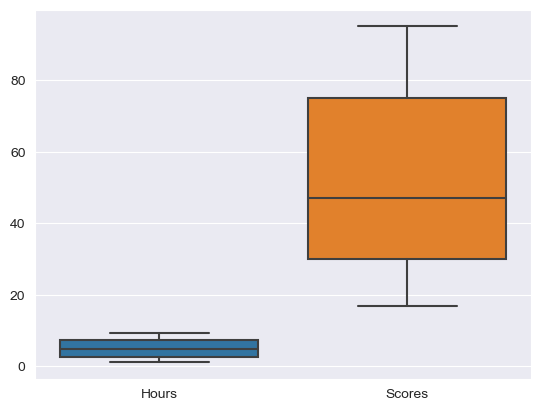

In [19]:
sns.boxplot(data=filen)

In [22]:
X = filen.iloc[:, :-1].values  
y = filen.iloc[:, 1].values


In [23]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [24]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()

In [26]:
linear.fit(train_X, train_y)

LinearRegression()

In [28]:
pred_y = linear.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [29]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


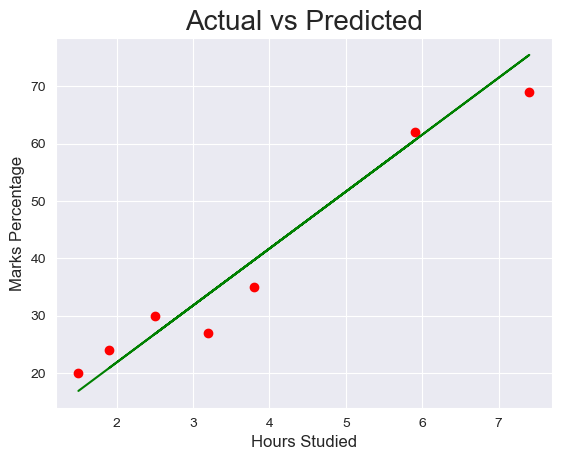

In [32]:
plt.scatter(x=val_X, y=val_y, color='red')
plt.plot(val_X, pred_y, color='Green')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [34]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


In [36]:
#predicted score
hours = [9.25]
answer = linear.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893
